# BANK CUSTOMERS DATASET ANALYSIS

Nicolas Javier Carreño Perea & Emmanuel Mosquera Casas
=
References: https://www.kaggle.com/koalablaize/raphael-blaise-logistic-regression-bank-data

## Extraccion de informacion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df_customers = pd.read_csv("../Datasets/Bank/BankCustomerData.csv")

In [15]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [17]:
df_customers.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [4]:
df_customers.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [18]:
df_customers.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

## Visualizacion de los datos

Matriz de correlacion

<AxesSubplot:>

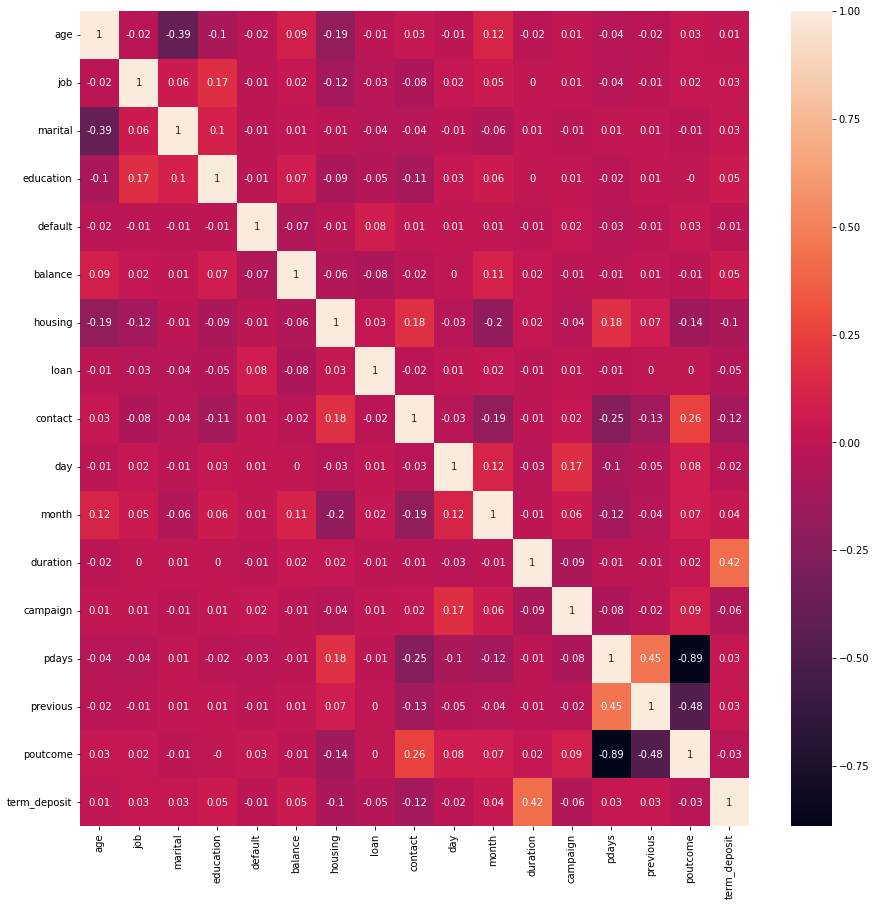

In [8]:
plt.subplots(figsize=(15, 15))
correlation_matrix = df_customers.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

Grafico pastel

0    0.907104
1    0.092896
Name: term_deposit, dtype: float64


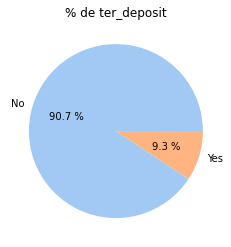

In [11]:
datos = df_customers.term_deposit.value_counts(normalize=True)
colors = sns.color_palette('pastel')[0:5]
print(datos)
plt.pie(datos, labels=["No","Yes"], autopct="%0.1f %%",colors = colors)
plt.title("% de ter_deposit")
plt.show()

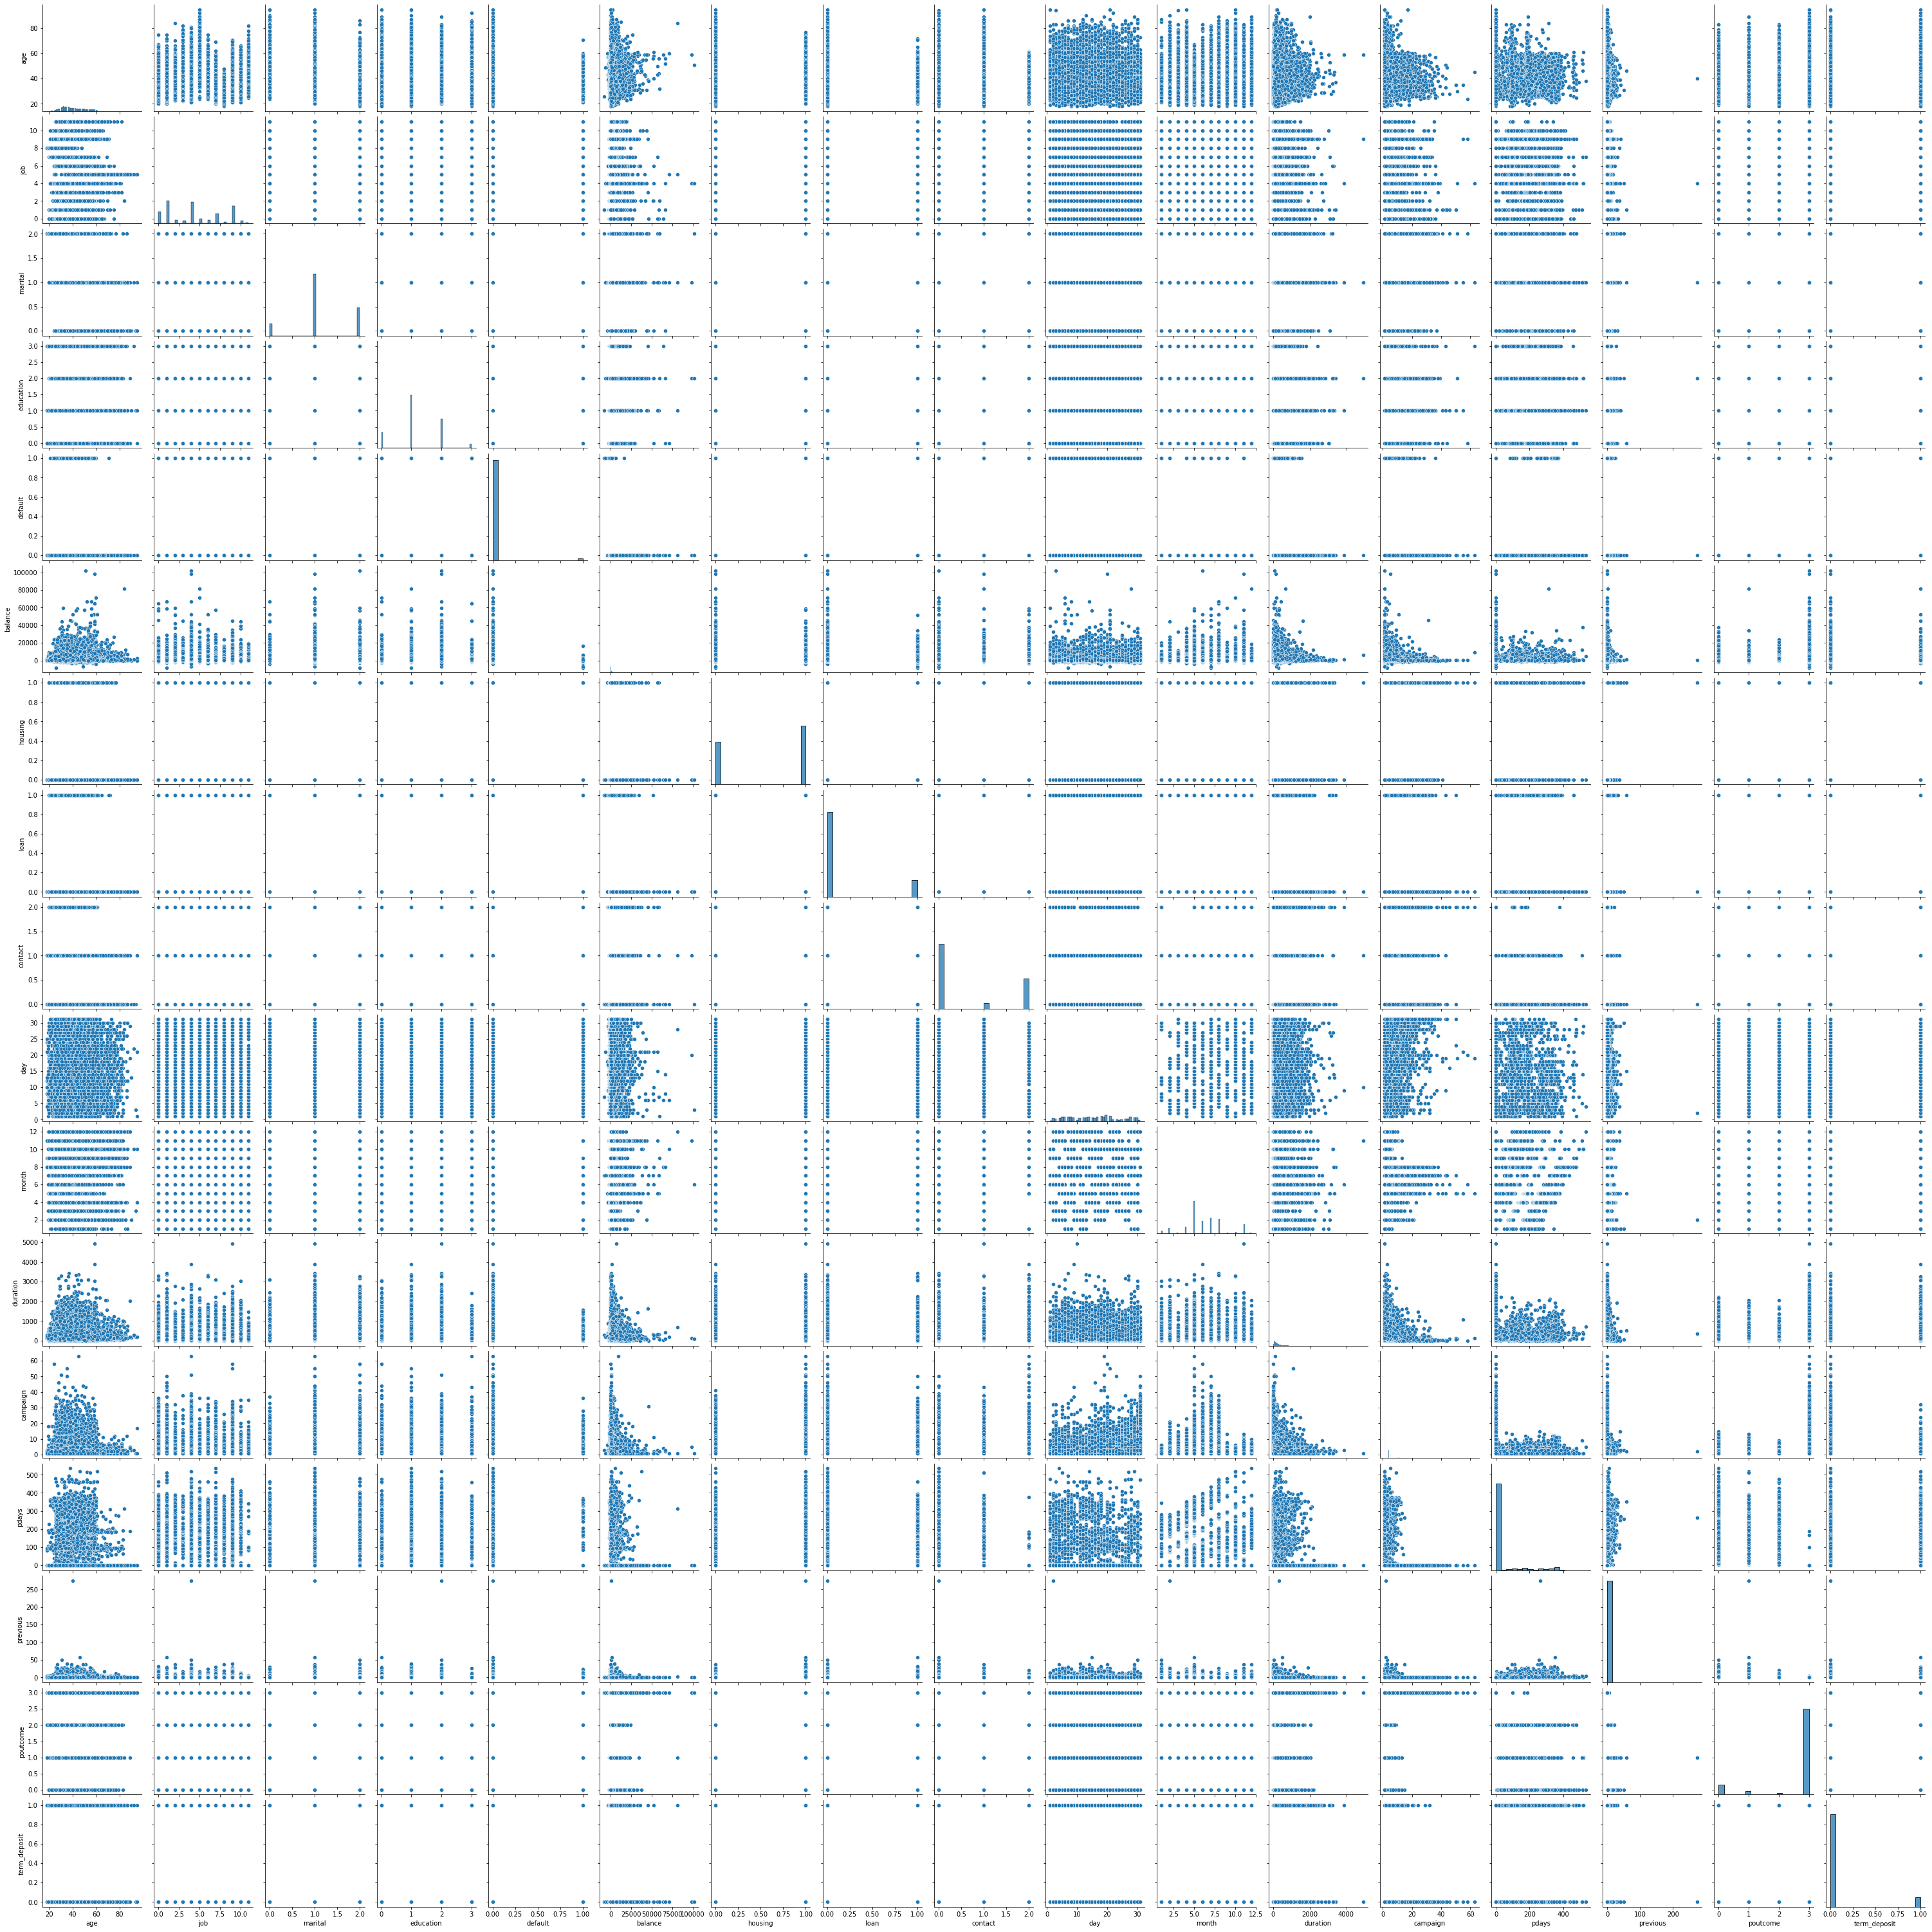

In [8]:
sns.pairplot(df_customers)

## Preprocesamiento de la informacion

Conversion de datos categoricos a numericos

In [29]:
df_customers['contact'].value_counts()

cellular     27218
unknown      12776
telephone     2645
Name: contact, dtype: int64

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_customers['job'] = label_encoder.fit_transform(df_customers['job']).astype('int64')
df_customers['marital'] = label_encoder.fit_transform(df_customers['marital']).astype('int64')
df_customers['education'] = label_encoder.fit_transform(df_customers['education']).astype('int64')
df_customers['default'] = label_encoder.fit_transform(df_customers['default']).astype('int64')
df_customers['housing'] = label_encoder.fit_transform(df_customers['housing']).astype('int64')
df_customers['loan'] = label_encoder.fit_transform(df_customers['loan']).astype('int64')
df_customers['contact'] = label_encoder.fit_transform(df_customers['contact']).astype('int64')
df_customers['poutcome'] = label_encoder.fit_transform(df_customers['poutcome']).astype('int64')
df_customers['term_deposit'] = label_encoder.fit_transform(df_customers['term_deposit']).astype('int64')

In [7]:
#Convertimos el tipo de dato de mes a numerico
values = {"month": {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,
'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}} #Benign:0 Malign:1
df_customers.replace(values, inplace=True)
df_customers['month'].value_counts()

5     13532
7      6587
8      5987
6      5128
11     3895
4      2718
2      2296
1      1224
10      518
9       282
3       258
12      214
Name: month, dtype: int64

In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           42639 non-null  int64
 1   job           42639 non-null  int64
 2   marital       42639 non-null  int64
 3   education     42639 non-null  int64
 4   default       42639 non-null  int64
 5   balance       42639 non-null  int64
 6   housing       42639 non-null  int64
 7   loan          42639 non-null  int64
 8   contact       42639 non-null  int64
 9   day           42639 non-null  int64
 10  month         42639 non-null  int64
 11  duration      42639 non-null  int64
 12  campaign      42639 non-null  int64
 13  pdays         42639 non-null  int64
 14  previous      42639 non-null  int64
 15  poutcome      42639 non-null  int64
 16  term_deposit  42639 non-null  int64
dtypes: int64(17)
memory usage: 5.5 MB


Segun el Content anexo al dataset, se indica que para un modelo mas realista, deberia descartarse la variable duracion.

In [6]:
df_customers = df_customers.drop(columns = ['duration'])

In [7]:
from sklearn.model_selection import train_test_split
x = df_customers.drop(columns=['term_deposit'])
y = df_customers['term_deposit']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Regresion Logistica

In [8]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.9066
Accuracy score:  0.9062


C:\Users\Nicolas Carreno\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[7728    6]
 [ 794    0]]


<AxesSubplot:>

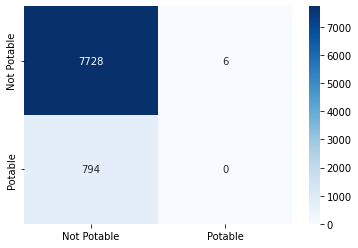

In [18]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Potable', 'Potable']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')

## Arbol de decision

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 9)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.9157
Accuracy score:  0.9091


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [20]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show(close=None, block=None)>

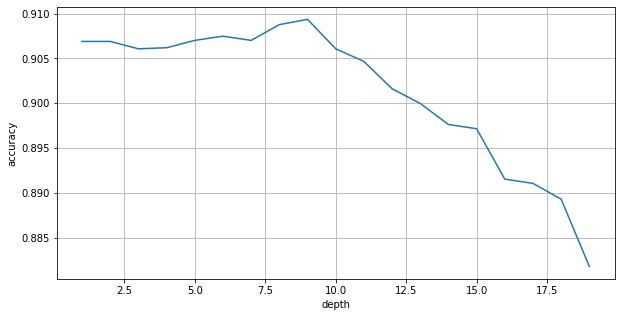

In [21]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

## Support Vector Machine

In [11]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.9072
Accuracy score:  0.9069


## KNN Neighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.9122
Accuracy score:  0.9008


In [47]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show(close=None, block=None)>

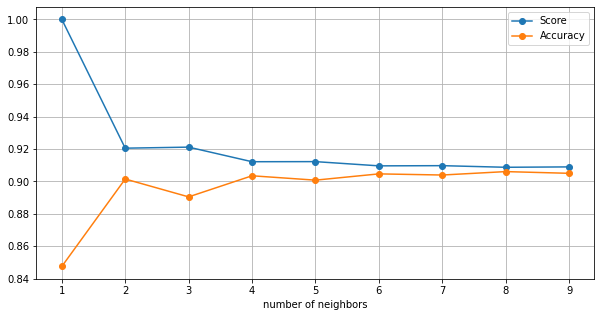

In [48]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

## RESULTADOS COMPARATIVA MODELOS

In [50]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)


,Model,Score,Accuracy
1,Decision Tree,0.9157,0.9091
3,KNN,0.9122,0.9008
2,Support Vector Machine,0.9072,0.9069
0,Logistic Regression,0.9066,0.9062


Segun los resultados obtenidos el modelo de ML que mejor se ajusta al dataset es el de Arbol de decision con una profundidad optima de aproximadamente 9 niveles, ya que presenta el menor sobreajuste, y los puntajes de train y test mas altos sin un alto uso computacional. Sin embargo el modelo de KNN mostro resultados muy cercanos y bastante buenos para la clasificacion.